# ICCLIM C4I: Calculate the Averaged Temperature Anomaly 2081-2100 vs 1971-2000 SSP585

Example notebook that runs ICCLIM, which is pre-installed in the virtual environment env-gloenv-icclim5.4.0 .

The example calculates the averaged temperature anomaly (using the TG indicator) for the period 2081-2100 compared to the reference 1971-2000 for SSP585 and several climate models. It needs the tas parameter chosen by the user on C4I. Alternatively, it could also be used as an example for any other climate indice.

The data is read using xarray and a plot of the time series averaged over Europe is generated, as well as an average spatial map. Several output types examples are shown.

The datasets that are expected for this notebook are tas parameter (needed to calculate the TG indicator) for several climate models, for the historical (1971-2000) and ssp585 (2081-2100) experiments and for one member. Daily data is used. In C4I, you can find all of the data needed in the CMIP6 project, at the **esgf-data3.ceda.ac.uk** and **esgf3.dkrz.de** mirrors.

## Choose the kernel env-gloenv-iccclim540
### Creation of the virtual env (already created)

module load python/gloenv3.9

python3 -m venv --system-site-packages /data/scratch/globc/coquart/DATA_FOR_COMMON_JUPYTER_NOTEBOOKS/env-gloenv-icclim540

source /data/scratch/globc/coquart/DATA_FOR_COMMON_JUPYTER_NOTEBOOKS/env-gloenv-icclim540/bin/activate

pip install --upgrade pip

pip install icclim

pip install nc_time_axis

pip install ipykernel

deactivate

### Add this environment to your jupyter kernel¶

source /data/scratch/globc/coquart/DATA_FOR_COMMON_JUPYTER_NOTEBOOKS/env-gloenv-icclim540/bin/activate

python3 -m ipykernel install --user --name env-gloenv-icclim540

close and reopen the notebook to see the new kernel env-gloenv-icclim540 and use it

### Delete the environment from your jupyter kernel¶
jupyter kernelspec list

jupyter kernelspec uninstall env-gloenv-icclim540

### Preparation of the needed modules

In [1]:
import icclim

import sys
import glob
import os
import datetime
import cftime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import nc_time_axis

print("python: ",sys.version)
print("numpy: ", np.__version__)
print("xarray: ", xr.__version__)
print("pandas: ", pd.__version__)
print("icclim: ", icclim.__version__)

python:  3.9.7 | packaged by conda-forge | (default, Sep 23 2021, 07:28:37) 
[GCC 9.4.0]
numpy:  1.21.2
xarray:  0.19.0
pandas:  1.3.3
icclim:  5.4.0


### Specification of the parameters and period of interest

The time period of interest as well as the reference period are defined here.
A list of models is listed here as an example.
Here we used Monthly data (Amon) but daily data could also be used.
The corresponding datafiles must have been selected by the user, containing both the studied and referenced periods.

icclim is then executed for both periods for each climate model separately.

In [2]:
# studied period
dt1 = datetime.datetime(2081,1,1)
dt2 = datetime.datetime(2100,12,31)

# reference period
dtr1 = datetime.datetime(1971,1,1)
dtr2 = datetime.datetime(2000,12,31)

models=['ACCESS-CM2','BCC-CSM2-MR','CMCC-ESM2','GFDL-ESM4','INM-CM5-0','MPI-ESM1-2-LR']
out_f={}
out_hist_f={}
files=[]
files_hist=[]
for model in models:
  print("Processing model: "+model)
  out_f[model] = 'tg_icclim_'+model+'.nc'
  out_hist_f[model] = 'tg_icclim_'+model+'_hist.nc'
  files.append('tg_icclim_'+model+'.nc')
  files_hist.append('tg_icclim_'+model+'_hist.nc')
  #tas_day_INM-CM5-0_historical_r1i1p1f1_gr1_19500101-19991231.nc
  #tas_day_INM-CM5-0_historical_r1i1p1f1_gr1_20000101-20141231.nc
  #tas_day_INM-CM5-0_ssp585_r1i1p1f1_gr1_20650101-21001231.nc
  filenames_hist = glob.glob('/data/scratch/globc/coquart/DATA_FOR_COMMON_JUPYTER_NOTEBOOKS/data_icclim/latest/tas_day_'+model+'_historical_*.nc')
  filenames = glob.glob('/data/scratch/globc/coquart/DATA_FOR_COMMON_JUPYTER_NOTEBOOKS/data_icclim/latest/tas_day_'+model+'_ssp585_*.nc')

  icclim.indice(indice_name='TG', in_files=filenames, var_name='tas', slice_mode='year', time_range=[dt1, dt2], transfer_limit_Mbytes=200, out_file=out_f[model])
  icclim.indice(indice_name='TG', in_files=filenames_hist, var_name='tas', slice_mode='year', time_range=[dtr1, dtr2], transfer_limit_Mbytes=200, out_file=out_hist_f[model])

2022-08-10 16:21:40,437 DEPRECATION_WARNING: `icclim.indice` is deprecated. Use `icclim.index` instead.
2022-08-10 16:21:40,437 --- icclim 5.4.0
2022-08-10 16:21:40,437 --- BEGIN EXECUTION
2022-08-10 16:21:40,438 Processing: 0%
2022-08-10 16:21:40,438 DEPRECATION_WARNING: `indice_name` is deprecated. Use `index_name` instead.
2022-08-10 16:21:40,438 DEPRECATION_WARNING: `transfer_limit_Mbytes` is deprecated and will be removed. Its value is ignored.


Processing model: ACCESS-CM2


2022-08-10 16:21:41,180 Calculating climate index: TG
2022-08-10 16:21:48,312 Processing: 100%
2022-08-10 16:21:48,314 --- icclim 5.4.0
2022-08-10 16:21:48,314 --- CPU SECS = 15.885    
2022-08-10 16:21:48,314 --- END EXECUTION
2022-08-10 16:21:48,318 DEPRECATION_WARNING: `icclim.indice` is deprecated. Use `icclim.index` instead.
2022-08-10 16:21:48,319 --- icclim 5.4.0
2022-08-10 16:21:48,319 --- BEGIN EXECUTION
2022-08-10 16:21:48,320 Processing: 0%
2022-08-10 16:21:48,320 DEPRECATION_WARNING: `indice_name` is deprecated. Use `index_name` instead.
2022-08-10 16:21:48,320 DEPRECATION_WARNING: `transfer_limit_Mbytes` is deprecated and will be removed. Its value is ignored.
2022-08-10 16:21:49,742 Calculating climate index: TG
2022-08-10 16:21:59,804 Processing: 100%
2022-08-10 16:21:59,805 --- icclim 5.4.0
2022-08-10 16:21:59,805 --- CPU SECS = 28.492    
2022-08-10 16:21:59,805 --- END EXECUTION
2022-08-10 16:21:59,818 DEPRECATION_WARNING: `icclim.indice` is deprecated. Use `icclim.in

Processing model: BCC-CSM2-MR


2022-08-10 16:22:03,672 Calculating climate index: TG
2022-08-10 16:22:06,023 Processing: 100%
2022-08-10 16:22:06,023 --- icclim 5.4.0
2022-08-10 16:22:06,024 --- CPU SECS = 34.234    
2022-08-10 16:22:06,024 --- END EXECUTION
2022-08-10 16:22:06,025 DEPRECATION_WARNING: `icclim.indice` is deprecated. Use `icclim.index` instead.
2022-08-10 16:22:06,026 --- icclim 5.4.0
2022-08-10 16:22:06,026 --- BEGIN EXECUTION
2022-08-10 16:22:06,026 Processing: 0%
2022-08-10 16:22:06,027 DEPRECATION_WARNING: `indice_name` is deprecated. Use `index_name` instead.
2022-08-10 16:22:06,027 DEPRECATION_WARNING: `transfer_limit_Mbytes` is deprecated and will be removed. Its value is ignored.
2022-08-10 16:22:12,578 Calculating climate index: TG
2022-08-10 16:22:16,642 Processing: 100%
2022-08-10 16:22:16,643 --- icclim 5.4.0
2022-08-10 16:22:16,643 --- CPU SECS = 42.921    
2022-08-10 16:22:16,643 --- END EXECUTION
2022-08-10 16:22:16,648 DEPRECATION_WARNING: `icclim.indice` is deprecated. Use `icclim.in

Processing model: CMCC-ESM2


2022-08-10 16:22:17,514 Calculating climate index: TG
2022-08-10 16:22:23,702 Processing: 100%
2022-08-10 16:22:23,703 --- icclim 5.4.0
2022-08-10 16:22:23,703 --- CPU SECS = 52.756    
2022-08-10 16:22:23,703 --- END EXECUTION
2022-08-10 16:22:23,713 DEPRECATION_WARNING: `icclim.indice` is deprecated. Use `icclim.index` instead.
2022-08-10 16:22:23,714 --- icclim 5.4.0
2022-08-10 16:22:23,714 --- BEGIN EXECUTION
2022-08-10 16:22:23,714 Processing: 0%
2022-08-10 16:22:23,714 DEPRECATION_WARNING: `indice_name` is deprecated. Use `index_name` instead.
2022-08-10 16:22:23,715 DEPRECATION_WARNING: `transfer_limit_Mbytes` is deprecated and will be removed. Its value is ignored.
2022-08-10 16:22:24,816 Calculating climate index: TG
2022-08-10 16:22:33,417 Processing: 100%
2022-08-10 16:22:33,418 --- icclim 5.4.0
2022-08-10 16:22:33,418 --- CPU SECS = 67.164    
2022-08-10 16:22:33,419 --- END EXECUTION
2022-08-10 16:22:33,433 DEPRECATION_WARNING: `icclim.indice` is deprecated. Use `icclim.in

Processing model: GFDL-ESM4


2022-08-10 16:22:34,638 Calculating climate index: TG
2022-08-10 16:22:39,430 Processing: 100%
2022-08-10 16:22:39,431 --- icclim 5.4.0
2022-08-10 16:22:39,431 --- CPU SECS = 75.557    
2022-08-10 16:22:39,432 --- END EXECUTION
2022-08-10 16:22:39,436 DEPRECATION_WARNING: `icclim.indice` is deprecated. Use `icclim.index` instead.
2022-08-10 16:22:39,437 --- icclim 5.4.0
2022-08-10 16:22:39,437 --- BEGIN EXECUTION
2022-08-10 16:22:39,438 Processing: 0%
2022-08-10 16:22:39,438 DEPRECATION_WARNING: `indice_name` is deprecated. Use `index_name` instead.
2022-08-10 16:22:39,438 DEPRECATION_WARNING: `transfer_limit_Mbytes` is deprecated and will be removed. Its value is ignored.
2022-08-10 16:22:40,922 Calculating climate index: TG
2022-08-10 16:22:48,234 Processing: 100%
2022-08-10 16:22:48,235 --- icclim 5.4.0
2022-08-10 16:22:48,235 --- CPU SECS = 88.056    
2022-08-10 16:22:48,236 --- END EXECUTION
2022-08-10 16:22:48,243 DEPRECATION_WARNING: `icclim.indice` is deprecated. Use `icclim.in

Processing model: INM-CM5-0


2022-08-10 16:22:48,600 Calculating climate index: TG
2022-08-10 16:22:54,066 Processing: 100%
2022-08-10 16:22:54,067 --- icclim 5.4.0
2022-08-10 16:22:54,067 --- CPU SECS = 94.610    
2022-08-10 16:22:54,068 --- END EXECUTION
2022-08-10 16:22:54,070 DEPRECATION_WARNING: `icclim.indice` is deprecated. Use `icclim.index` instead.
2022-08-10 16:22:54,071 --- icclim 5.4.0
2022-08-10 16:22:54,071 --- BEGIN EXECUTION
2022-08-10 16:22:54,071 Processing: 0%
2022-08-10 16:22:54,072 DEPRECATION_WARNING: `indice_name` is deprecated. Use `index_name` instead.
2022-08-10 16:22:54,072 DEPRECATION_WARNING: `transfer_limit_Mbytes` is deprecated and will be removed. Its value is ignored.
2022-08-10 16:22:54,459 Calculating climate index: TG
2022-08-10 16:22:58,713 Processing: 100%
2022-08-10 16:22:58,713 --- icclim 5.4.0
2022-08-10 16:22:58,713 --- CPU SECS = 100.658   
2022-08-10 16:22:58,714 --- END EXECUTION
2022-08-10 16:22:58,722 DEPRECATION_WARNING: `icclim.indice` is deprecated. Use `icclim.in

Processing model: MPI-ESM1-2-LR


2022-08-10 16:22:59,413 Calculating climate index: TG
2022-08-10 16:23:02,398 Processing: 100%
2022-08-10 16:23:02,398 --- icclim 5.4.0
2022-08-10 16:23:02,399 --- CPU SECS = 105.005   
2022-08-10 16:23:02,399 --- END EXECUTION
2022-08-10 16:23:02,402 DEPRECATION_WARNING: `icclim.indice` is deprecated. Use `icclim.index` instead.
2022-08-10 16:23:02,402 --- icclim 5.4.0
2022-08-10 16:23:02,403 --- BEGIN EXECUTION
2022-08-10 16:23:02,403 Processing: 0%
2022-08-10 16:23:02,403 DEPRECATION_WARNING: `indice_name` is deprecated. Use `index_name` instead.
2022-08-10 16:23:02,403 DEPRECATION_WARNING: `transfer_limit_Mbytes` is deprecated and will be removed. Its value is ignored.
2022-08-10 16:23:03,122 Calculating climate index: TG
2022-08-10 16:23:07,669 Processing: 100%
2022-08-10 16:23:07,669 --- icclim 5.4.0
2022-08-10 16:23:07,670 --- CPU SECS = 111.513   
2022-08-10 16:23:07,670 --- END EXECUTION


### Data preparation

Here all data is loaded in 2 separate variables, one containing all the historical periods for all the models, and the same for the future time period.

An example is shown on how to select a specific data location. But this is not used.

In [3]:
# Open datasets
tg = []
tg_hist = []
ds = []
ds_hist = []
for model in models:
    dsl = xr.open_dataset(out_f[model], decode_times=False)
    dsl['time'] = xr.decode_cf(dsl).time
    dsl = dsl.assign_coords({'model_id':model})
    tg.append(dsl['TG'])
    
    dshl = xr.open_dataset(out_hist_f[model], decode_times=False)
    dshl['time'] = xr.decode_cf(dshl).time
    dshl = dshl.assign_coords({'model_id':model})
    tg_hist.append(dshl['TG'])

# Select a single x,y combination from the data
longitude = tg[0]["lon"].sel(lon=3.5, method='nearest').values
latitude = tg[0]["lat"].sel(lat=44.2, method='nearest').values

print("Long, Lat values:", longitude, latitude)

Long, Lat values: 2.8125 44.375


### Perform spacial average on all the geographical domain

In [4]:
# Average different grids
for ii in range(len(tg)):
    tg[ii] = tg[ii].sel(lat=[0., 90.],method='nearest').mean(dim=['lon','lat'])
for ii in range(len(tg_hist)):
    tg_hist[ii] = tg_hist[ii].sel(lat=[0., 90.],method='nearest').mean(dim=['lon','lat'])

### Define a function to align all different calendar types

In [5]:
# Define function to align different calendars using annual data
def to_360day_annual(da):
    '''Takes a DataArray. Change the 
    calendar to 360_day and precision to annual.'''
    val = da.copy()
    timev = []
    years = [int(val) for val in da.time.dt.strftime("%Y")]
    for itime in range(val.sizes['time']):
       timev.append(cftime.Datetime360Day(years[itime],1,16))

    time1 = xr.DataArray(data=timev, dims=["time"])
    time1.name = 'time'
    # We rename the time dimension and coordinate to time360 to make it clear it isn't 
    # the original time coordinate.
    val = val.rename({'time':'time360'})
    time1 = time1.rename({'time':'time360'})
    val = val.assign_coords({'time360':time1})
    return val

### Align calendars of all input data

In [6]:
# Convert all calendars to annual precision (we have configured icclim to output yearly data)

ll = [to_360day_annual(da) for da in tg]
ll_hist = [to_360day_annual(da) for da in tg_hist]

# Concatenate all models into one
full_tg = xr.concat(ll, 'model_id', join='outer')
full_tg_hist = xr.concat(ll_hist, 'model_id', join='outer')
full_tg_anomaly = full_tg - full_tg_hist.mean(dim='time360')

### Plot a multi-model time series for the future time period

Temperature for SSP585 of the period 2080-2100.

The multi-model average is shown in bold black line.

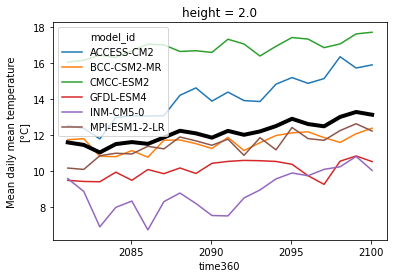

In [7]:
# Plot future time period and superimpose multi-model average in bold black line
full_tg.plot(hue='model_id')
full_tg.mean(dim='model_id').plot(color='black', linewidth=4)

### Plot a time series of the anomaly of temperature
Anomaly of temperature for SSP585 of the period 2080-2100 compared to 1971-2000.

The multi-model average is shown in bold black line.

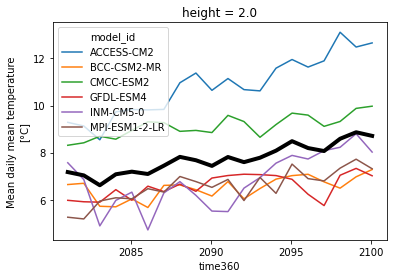

In [8]:
# Plot temperature anomaly compared to historical period and superimpose multi-model average in bold black line
full_tg_anomaly.plot(hue='model_id')
full_tg_anomaly.mean(dim='model_id').plot(color='black', linewidth=4)